<a href="https://colab.research.google.com/github/jkcg-learning/PoseEstimation/blob/main/vibe_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIBE: Video Inference for Human Body Pose and Shape Estimation

Demo of the original PyTorch based implementation provided here: https://github.com/mkocabas/VIBE

## Note
Before running this notebook make sure that your runtime type is 'Python 3 with GPU acceleration'. Go to Edit > Notebook settings > Hardware Accelerator > Select "GPU".

## More Info
- Paper: https://arxiv.org/abs/1912.05656
- Repo: https://github.com/mkocabas/VIBE

In [1]:
# Clone the repo
!git clone https://github.com/mkocabas/VIBE.git

fatal: destination path 'VIBE' already exists and is not an empty directory.


In [2]:
%cd VIBE/

/content/VIBE


In [3]:
# Install the other requirements
!pip install torch==1.4.0 numpy==1.17.5
!pip install git+https://github.com/giacaglia/pytube.git --upgrade
!pip install -r requirements.txt

  Cloning https://github.com/giacaglia/pytube.git to /tmp/pip-req-build-h5bxl9f5
  Running command git clone -q https://github.com/giacaglia/pytube.git /tmp/pip-req-build-h5bxl9f5
  Cloning https://github.com/mattloper/chumpy.git to /tmp/pip-req-build-nzx242h6
  Running command git clone -q https://github.com/mattloper/chumpy.git /tmp/pip-req-build-nzx242h6
  Cloning https://github.com/mkocabas/yolov3-pytorch.git to /tmp/pip-req-build-et34eent
  Running command git clone -q https://github.com/mkocabas/yolov3-pytorch.git /tmp/pip-req-build-et34eent
  Cloning https://github.com/mkocabas/multi-person-tracker.git to /tmp/pip-req-build-4yn4oxjh
  Running command git clone -q https://github.com/mkocabas/multi-person-tracker.git /tmp/pip-req-build-4yn4oxjh


In [4]:
# Download pretrained weights and SMPL data
!source scripts/prepare_data.sh

Downloading...
From: https://drive.google.com/uc?id=1untXhYOLQtpNEy4GTY_0fL_H-k6cTf_r
To: /content/VIBE/data/vibe_data.zip
100% 561M/561M [00:04<00:00, 117MB/s]
Archive:  vibe_data.zip
   creating: vibe_data/
  inflating: vibe_data/smpl_mean_params.npz  
  inflating: vibe_data/vibe_model_w_3dpw.pth.tar  
  inflating: vibe_data/gmm_08.pkl    
  inflating: vibe_data/J_regressor_h36m.npy  
  inflating: vibe_data/vibe_model_wo_3dpw.pth.tar  
  inflating: vibe_data/SMPL_NEUTRAL.pkl  
  inflating: vibe_data/J_regressor_extra.npy  
  inflating: vibe_data/spin_model_checkpoint.pth.tar  
  inflating: vibe_data/sample_video.mp4  
  inflating: vibe_data/yolov3.weights  


### Run the demo code.

Check https://github.com/mkocabas/VIBE/blob/master/doc/demo.md for more details about demo.

**Note:** Final rendering is slow compared to inference. We use pyrender with GPU accelaration and it takes 2-3 FPS per image. Please let us know if you know any faster alternative. 

In [5]:
# Run the demo
!python demo.py --vid_file sample_video.mp4 --output_folder output/ --sideview

# You may use --sideview flag to enable from a different viewpoint, note that this doubles rendering time.
# !python demo.py --vid_file sample_video.mp4 --output_folder output/ --sideview

# You may also run VIBE on a YouTube video by providing a link
# python demo.py --vid_file https://www.youtube.com/watch?v=c4DAnQ6DtF8 --output_folder output/ --display

Running "ffmpeg -i sample_video.mp4 -f image2 -v error /tmp/sample_video_mp4/%06d.png"
Images saved to "/tmp/sample_video_mp4"
Input video number of frames 300
--2022-03-31 09:53:13--  https://raw.githubusercontent.com/mkocabas/yolov3-pytorch/master/yolov3/config/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8338 (8.1K) [text/plain]
Saving to: ‘/root/.torch/config/yolov3.cfg’

yolov3.cfg          100%[===================>]   8.14K  --.-KB/s    in 0s      

2022-03-31 09:53:13 (49.2 MB/s) - ‘/root/.torch/config/yolov3.cfg’ saved [8338/8338]

Running Multi-Person-Tracker
100% 25/25 [00:29<00:00,  1.16s/it]
Finished. Detection + Tracking FPS 10.07
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpo

In [6]:
# Play the generated video
from IPython.display import HTML
from base64 import b64encode

def video(path):
  mp4 = open(path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML('<video width=500 controls loop> <source src="%s" type="video/mp4"></video>' % data_url)

video('output/sample_video/sample_video_vibe_result.mp4')

In [29]:
# Inspect the output file content
import joblib
output = joblib.load('output/sample_video/vibe_output.pkl')
print('Track ids:', output.keys(), end='\n\n')

print('VIBE output file content:', end='\n\n')
for k,v in output[1].items():
  if k != 'joints2d': 
    print(k, v.shape)
  if k== 'joints2d_img_coord':
    print(v[0])
    plot_joints = v[0]  

Track ids: dict_keys([1])

VIBE output file content:

pred_cam (300, 3)
orig_cam (300, 4)
verts (300, 6890, 3)
pose (300, 72)
betas (300, 10)
joints3d (300, 49, 3)
joints2d_img_coord (300, 49, 2)
[[ 963.79333  297.39102]
 [ 959.75995  352.34933]
 [ 886.3686   366.8879 ]
 [ 827.004    275.12323]
 [ 882.0969   178.82755]
 [1032.9227   360.0467 ]
 [1078.9745   260.1823 ]
 [1007.30475  176.29071]
 [ 962.5869   591.681  ]
 [ 935.0448   631.064  ]
 [ 851.52936  768.09155]
 [ 784.4942   909.3049 ]
 [ 989.7883   632.22705]
 [1068.9287   767.5555 ]
 [1115.9261   912.444  ]
 [ 947.6088   283.3259 ]
 [ 977.62805  282.17728]
 [ 926.9513   299.13504]
 [ 996.32684  295.62335]
 [1131.7484   931.04755]
 [1159.2805   927.2009 ]
 [1123.1199   927.8928 ]
 [ 788.41876  930.4539 ]
 [ 752.8572   921.12366]
 [ 770.35297  925.0486 ]
 [ 784.4942   909.3049 ]
 [ 851.52936  768.09155]
 [ 907.5967   579.0911 ]
 [1016.1557   580.52997]
 [1068.9287   767.5555 ]
 [1115.9261   912.444  ]
 [ 882.0969   178.82755]
 [ 8

In [45]:
import cv2
capture = cv2.VideoCapture('/content/VIBE/sample_video.mp4')
input_video_size = (int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)),
                            int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("Size of Input Video: ", input_video_size)

Size of Input Video:  (1920, 1080)


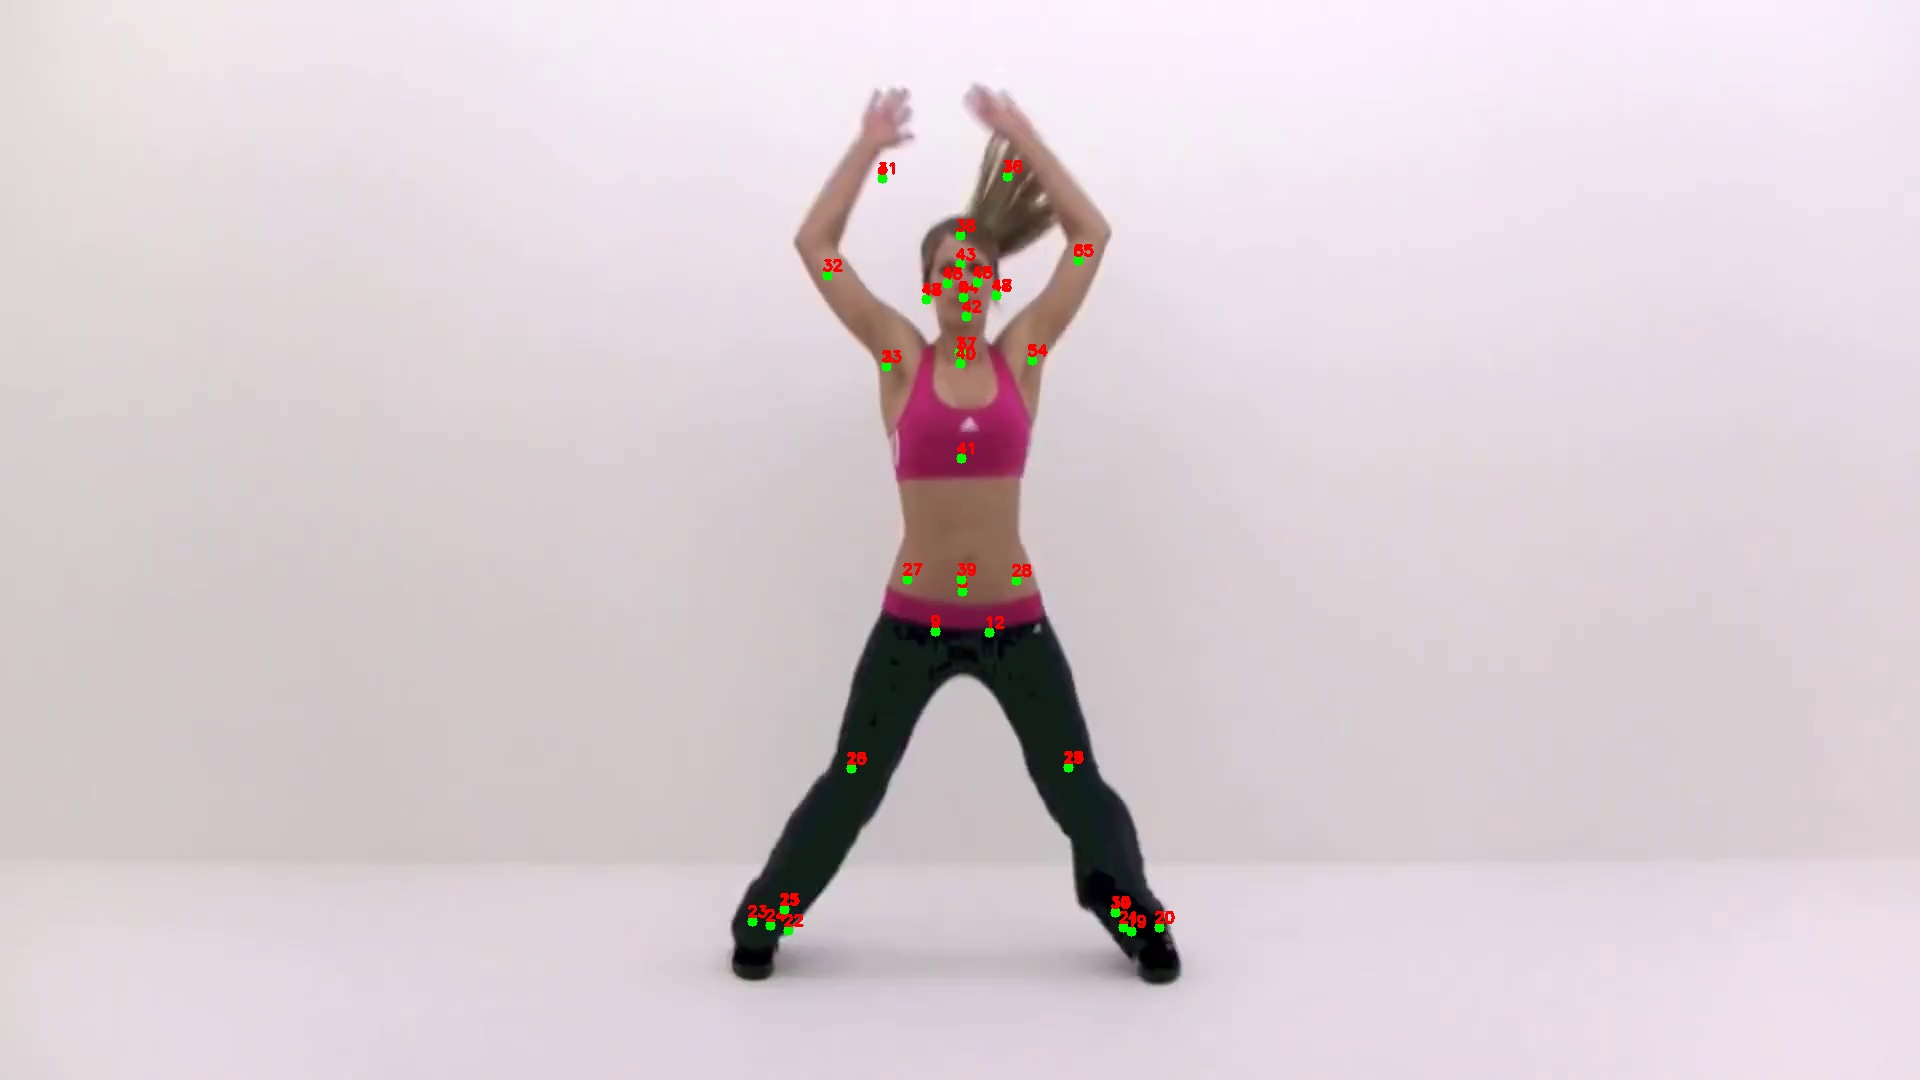

In [46]:
frame_count = 0
while capture.isOpened():

            success_message, img_frame = capture.read()

            if not success_message:
                print("Stopped execution")
                break

            elif frame_count == 1:
              break

            elif frame_count == 0:
              for id,joint_locations in enumerate(plot_joints):
                x = joint_locations[0]
                y = joint_locations[1]
                #print(id,x,y)
                cv2.circle(img_frame, (x,y), 5, (0, 255, 0), cv2.FILLED)
                cv2.putText(img_frame, str(id), (int(x) - 5, int(y) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
              frame_count += 1
              cv2.imwrite('VIBE_Joints.jpg', img_frame)  


from IPython.display import Image
Image('VIBE_Joints.jpg')